# <span style="color:darkblue"> QTM 530 Homework 4 </span>

Linchuan Zhang

10/9/2024

I received permission from Professor Sanchez-Becerra for an extension on this assignment's due time. Sorry for the late submission!

In [330]:
import pandas as pd
import matplotlib.pyplot as plt

In [331]:
bills_actions = pd.read_csv("data_raw/bills_actions.csv")

**Data Quality Check**

In [332]:
# Check the data types of each column
bills_actions.dtypes

Congress        int64
bill_number     int64
bill_type      object
action         object
main_action    object
category       object
member_id       int64
dtype: object

In [333]:
# Check for missing values in the column "bill_number"
bills_actions["bill_number"].isnull().sum()

0

In [334]:
# Check for missing values in the column "action"
bills_actions["action"].isnull().sum()

0

As shown above, these two columns don't have any missing values. I used the same code to check other variables, and none of them have missing values. To save space, I will not present the details here.

# <span style="color:darkblue"> Part I. Descriptive Statistics </span>

**Q1.1 How many distinct bills are there?**

In [335]:
# Use unique function to count the total number of distinct bills
unique_bill_numbers = bills_actions["bill_number"].nunique()
print(f'There are {unique_bill_numbers} distinct bills in this dataset.')

There are 1331 distinct bills in this dataset.


**Q1.2  What proportion of the rows belong to different categories?**

In [336]:
# Calculate the total rows of each category, and then calculate the proportions
category_proportions = bills_actions["category"].value_counts(normalize=True).reset_index()
category_proportions.columns = ["Category", "Proportion"]

# Display the result
category_proportions

,Category,Proportion
0,amendment,0.462913
1,house bill,0.273085
2,senate bill,0.155616
3,house resolution,0.070845
4,senate resolution,0.018165
5,house joint resolution,0.006661
6,house concurrent resolution,0.006055
7,senate concurrent resolution,0.004239
8,senate joint resolution,0.002422


The table above shows the proportion of rows across different categories. For example, about 46% of total rows belong to the "amendment" category.

**Q1.3 Within each category, calculate the proportion of rows that belongs to different “main_action”**

In [337]:
# Create an empty list to store the results
main_actions_proportions_list = []

# Loop through each category
for each_category in bills_actions["category"].unique():
    categories= bills_actions.query("category == @each_category")
    
    # Calculate the proportions of each "main_action" within this category
    main_action_proportions = categories["main_action"].value_counts(normalize=True).reset_index()

    # Rename columns
    main_action_proportions.columns = ["main_action", "Proportion"]
    
    # Add the results to the list
    main_action_proportions["Category"] = each_category
    main_actions_proportions_list.append(main_action_proportions)

# Transfer the list to a DataFrame
main_action_proportions_across_categories = pd.concat(main_actions_proportions_list)

# Display the result
main_action_proportions_across_categories


,main_action,Proportion,Category
0,house amendment offered,0.541530,amendment
1,other house amendment actions,0.259647,amendment
2,senate amendment proposed (on the floor),0.187050,amendment
3,other senate amendment actions,0.011772,amendment
0,senate committee/subcommittee actions,0.651751,senate bill
1,house floor actions,0.225681,senate bill
2,senate committee report filed after reporting,0.064202,senate bill
3,reported to senate,0.033074,senate bill
4,senate floor actions,0.013619,senate bill
5,resolving differences -- house actions,0.011673,senate bill


The table above shows the proportion of rows that belong to different main actions for each category. For example, within the "amendment" category, about 54% of the rows belong to the "house amendment offered" main_action, 26% to "other house amendment actions," 19% to "senate amendment proposed (on the floor)," and 1% to "other senate amendment actions."

# <span style="color:darkblue"> Part II. House Floor Actions </span>

**Q2.1 How many house floor actions are there as part of senate bills (category)?**

In [338]:
# Subset the original dataset 
senate_bill_subset = bills_actions.query("category == 'senate bill'")
house_floor_actions_subset = senate_bill_subset.query("main_action == 'house floor actions'")

# Calculate the total rows of the subset to know the number of house floor actions
total_rows = len(house_floor_actions_subset)
print(f'There are {total_rows} house floor actions in this dataset as part of the category of senate bills.')

There are 116 house floor actions in this dataset as part of the category of senate bills.


**Q2.2 What proportion of these actions were suspended?**

In [339]:
# Use str.contains to find the keyword and create a subset that includes only the rows with this keyword.
house_floor_actions_subset[house_floor_actions_subset["action"].str.contains("suspend")]

,Congress,bill_number,bill_type,action,main_action,category,member_id
565,116,3147,s,Mrs. Luria moved to suspend the rules and pass...,house floor actions,senate bill,345
566,116,3201,s,Ms. Kuster (NH) moved to suspend the rules and...,house floor actions,senate bill,36
567,116,3414,s,Mr. Takano moved to suspend the rules and pass...,house floor actions,senate bill,777
569,116,3587,s,Mrs. Luria moved to suspend the rules and pass...,house floor actions,senate bill,345
570,116,3744,s,Mr. Sherman moved to suspend the rules and pas...,house floor actions,senate bill,125
...,...,...,...,...,...,...,...
790,116,906,s,Mr. Huffman moved to suspend the rules and pas...,house floor actions,senate bill,527
792,116,945,s,Mr. Clay moved to suspend the rules and pass t...,house floor actions,senate bill,1806
794,116,979,s,Ms. Norton moved to suspend the rules and pass...,house floor actions,senate bill,346
796,116,982,s,Ms. Scanlon moved to suspend the rules and pas...,house floor actions,senate bill,792


Take a look at the subset above to check how str.contains function work regarding identifying actions that were suspended.

In [340]:
# Create a subset including only rows with the keyword "suspend"
suspend_subset = house_floor_actions_subset[house_floor_actions_subset["action"].str.contains("suspend")]

# Calculate the number of rows
suspend_rows = len(suspend_subset)

# Calculate the proportion
suspend_proportion = suspend_rows/total_rows # total_rows: total rows of the "house floor actions" subset
print(suspend_proportion)

0.6896551724137931


As shown above, about 69% of these house floor actions were suspended.

**Q2.3 What proportion of these actions were suspended as amended?**

In [341]:
# Use str.contains to find the keyword and create a subset that includes only the rows with this keyword.
house_floor_actions_subset[house_floor_actions_subset["action"].str.contains("as amended")]

,Congress,bill_number,bill_type,action,main_action,category,member_id
574,116,461,s,Ms. Adams moved to suspend the rules and pass ...,house floor actions,senate bill,1239
582,116,1069,s,Mr. Huffman moved to suspend the rules and pas...,house floor actions,senate bill,527
586,116,1342,s,Mr. Case moved to suspend the rules and pass t...,house floor actions,senate bill,332
588,116,151,s,Mr. Pallone moved to suspend the rules and pas...,house floor actions,senate bill,393
590,116,1678,s,Mr. Cicilline moved to suspend the rules and p...,house floor actions,senate bill,263
592,116,1694,s,"Ms. Horn, Kendra S. moved to suspend the rules...",house floor actions,senate bill,1554
602,116,178,s,Mr. Sires moved to suspend the rules and pass ...,house floor actions,senate bill,19
623,116,1811,s,Mr. DeFazio moved to suspend the rules and pas...,house floor actions,senate bill,910
628,116,1869,s,Ms. Norton moved to suspend the rules and pass...,house floor actions,senate bill,346
631,116,1982,s,Mr. Carbajal moved to suspend the rules and pa...,house floor actions,senate bill,1029


As shown above, by using the keyword "as amended", the selected actions all include the keyword "suspend". Therefore, the potential scenarios where "as amended" might capture other contexts, rather than "suspend as amended", are excluded.

In [342]:
# Create a subset including only rows with the keyword "as amended"
suspend_as_amended_subset = house_floor_actions_subset[house_floor_actions_subset["action"].str.contains("as amended")]

# Calculate the number of rows
suspend_as_amended_rows = len(suspend_as_amended_subset)

# Calculate the proportion
suspend_as_amended_proportion = suspend_as_amended_rows/total_rows # total_rows: total rows of the "house floor actions" subset
print(suspend_as_amended_proportion)

0.15517241379310345


As shown above, about 15.5% of these house floor actions were suspended as amended.

**Q2.4**

**Part 1: Use regular expressions to extract the name of specific people;**


In [343]:
# Use str.findall to extract the relevant text
names_1 = house_floor_actions_subset["action"].str.findall(r"Mr\.\s*\S*")
names_2 = house_floor_actions_subset["action"].str.findall(r"Ms\.\s*\S*")
names_3 = house_floor_actions_subset["action"].str.findall(r"Mrs\.\s*\S*")

# Remove any rows where the extracted list of names is empty
names_1_cleaned = names_1[names_1.str.len() > 0]
names_2_cleaned = names_2[names_2.str.len() > 0]
names_3_cleaned = names_3[names_3.str.len() > 0]

# Merge into a single dataset
name_dataset = pd.concat([names_1_cleaned, names_2_cleaned, names_3_cleaned])
name_dataset = pd.DataFrame(name_dataset)
name_dataset.columns = ["Senator Names Mentioned"]

name_dataset["Senator Names Mentioned"] = name_dataset["Senator Names Mentioned"].apply(lambda x: ' '.join(x)) # Remove the brackets from the extracted names

display(name_dataset)


,Senator Names Mentioned
560,Mr. Evans
562,Mr. Clay
564,Mr. Larsen
567,Mr. Takano
568,Mr. Raskin
...,...
685,Mrs. McBath
716,Mrs. Dingell
735,Mrs. Dingell
737,Mrs. Dingell


As shown above, all the mentioned names are extracted. 


**Part 2: Produce a new dataset counting how many bills mention the same person and extracting the names of the people mentioned;**


In [344]:
# Group by the 'Senator Names Mentioned' column and count
name_count_dataset = name_dataset.groupby("Senator Names Mentioned").size().reset_index(name="Mention Count")
name_count_dataset.head() # Quality check: first five rows 

,Senator Names Mentioned,Mention Count
0,Mr. Carbajal,3
1,Mr. Case,5
2,Mr. Cicilline,4
3,Mr. Cisneros,1
4,Mr. Clay,2


Above is the new dataset I produced to count how many bills mention the same person, and the names of the people mentioned. Then, I present some descriptive statistics:


**Part 3: What is the distribution of total bills proposed per person?**

In [345]:
total_mentions = len(name_dataset)
print(f'Senator names are mentioned {total_mentions} times for House floor actions in the category of Senate bills.')

Senator names are mentioned 116 times for House floor actions in the category of Senate bills.


In [346]:
unique_senator_numbers = name_dataset['Senator Names Mentioned'].nunique()
print(f'{unique_senator_numbers} distinct senators are mentioned for the 116 House floor actions in the category of Senate bills.')

53 distinct senators are mentioned for the 116 House floor actions in the category of Senate bills.


In [347]:
# Descriptive statistics
name_count_dataset["Mention Count"].describe()

count    53.000000
mean      2.188679
std       1.776520
min       1.000000
25%       1.000000
50%       1.000000
75%       3.000000
max       9.000000
Name: Mention Count, dtype: float64

Distribution of total bills proposed per person:

Among all house floor actions, each senator on average proposes 2.18 bills, with a median of 1. The maximum number of bills proposed by a single senator is 9.

The plot below visualizes the distribution of total bills proposed per person.

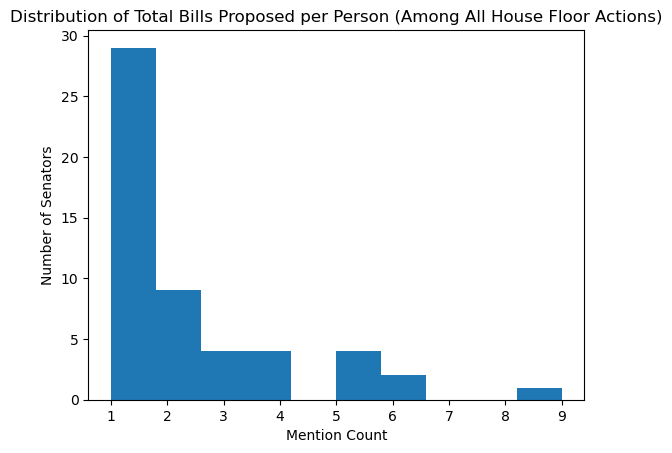

In [348]:
# Create a histogram for the "Mention Count" variable
plt.hist(name_count_dataset["Mention Count"], bins=10)
plt.title("Distribution of Total Bills Proposed per Person (Among All House Floor Actions)")
plt.xlabel("Mention Count")
plt.ylabel("Number of Senators")
plt.show()

# <span style="color:darkblue"> Part III. Subset of Bills (Senate Amendment Proposed) </span>

**Q3.1 Create a subset of bills whose actions are marked as “senate amendment proposed (on the floor)”**

In [299]:
senate_amend_proposed_subset = bills_actions.query("main_action == 'senate amendment proposed (on the floor)'")
senate_amend_proposed_subset.head() # Quality check

,Congress,bill_number,bill_type,action,main_action,category,member_id
0,116,1029,s,S.Amdt.1274 Amendment SA 1274 proposed by Sena...,senate amendment proposed (on the floor),amendment,858
1,116,1031,s,S.Amdt.2698 Amendment SA 2698 proposed by Sena...,senate amendment proposed (on the floor),amendment,675
2,116,1160,s,S.Amdt.2659 Amendment SA 2659 proposed by Sena...,senate amendment proposed (on the floor),amendment,858
8,116,1253,s,S.Amdt.2424 Amendment SA 2424 proposed by Sena...,senate amendment proposed (on the floor),amendment,297
11,116,1309,s,S.Amdt.1275 Amendment SA 1275 proposed by Sena...,senate amendment proposed (on the floor),amendment,858


**Q3.2 Part 1: Produce a new dataset counting how many senators are mentioned per bill**

In [300]:
# From the text, I know that the first senator follows the word "by", and the second senator follows the word "for"

# Use str.extract to extract the relevant text
senate_amend_proposed_subset_2 = senate_amend_proposed_subset.copy()
    # (\w+) is used in regular expressions to capture words
senate_amend_proposed_subset_2["Senator 1"] = senate_amend_proposed_subset["action"].str.extract(r"by Senator (\w+)") 
senate_amend_proposed_subset_2["Senator 2"] = senate_amend_proposed_subset["action"].str.extract(r"for Senator (\w+)")

# Use .notna() to check if the values are not missing and then sum up to create the "Senator Count" variable
senate_amend_proposed_subset_2["Senator Count"] = (
    senate_amend_proposed_subset_2["Senator 1"].notna().astype(int) + 
    senate_amend_proposed_subset_2["Senator 2"].notna().astype(int)
)

# Display the result
display(senate_amend_proposed_subset_2)

,Congress,bill_number,bill_type,action,main_action,category,member_id,Senator 1,Senator 2,Senator Count
0,116,1029,s,S.Amdt.1274 Amendment SA 1274 proposed by Sena...,senate amendment proposed (on the floor),amendment,858,McConnell,Cornyn,2
1,116,1031,s,S.Amdt.2698 Amendment SA 2698 proposed by Sena...,senate amendment proposed (on the floor),amendment,675,Hawley,NaN,1
2,116,1160,s,S.Amdt.2659 Amendment SA 2659 proposed by Sena...,senate amendment proposed (on the floor),amendment,858,McConnell,Smith,2
8,116,1253,s,S.Amdt.2424 Amendment SA 2424 proposed by Sena...,senate amendment proposed (on the floor),amendment,297,Feinstein,Cornyn,2
11,116,1309,s,S.Amdt.1275 Amendment SA 1275 proposed by Sena...,senate amendment proposed (on the floor),amendment,858,McConnell,Cardin,2
...,...,...,...,...,...,...,...,...,...,...
2947,116,6201,hr,S.Amdt.1558 Amendment SA 1558 proposed by Sena...,senate amendment proposed (on the floor),amendment,1701,Johnson,NaN,1
2948,116,6201,hr,S.Amdt.1559 Amendment SA 1559 proposed by Sena...,senate amendment proposed (on the floor),amendment,891,Murray,NaN,1
2949,116,6201,hr,S.Amdt.1556 Amendment SA 1556 proposed by Sena...,senate amendment proposed (on the floor),amendment,1666,Paul,NaN,1
3155,116,8337,hr,S.Amdt.2664 Amendment SA 2664 proposed by Sena...,senate amendment proposed (on the floor),amendment,858,McConnell,NaN,1


Above is the new dataset I created with three additional columns: Senator 1 (the name of the first senator), Senator 2 (the name of the second senator), and Senator Count (the total number of senators mentioned).

**Part 2: Distribution of number of senators per bill**

In [301]:
# Descriptive statistics
senate_amend_proposed_subset_2["Senator Count"].describe()

count    286.000000
mean       1.685315
std        0.465204
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: Senator Count, dtype: float64

In [302]:
# Calculate percentages
senator_count_percentages = senate_amend_proposed_subset_2["Senator Count"].value_counts(normalize=True) * 100
senator_count_percentages

Senator Count
2    68.531469
1    31.468531
Name: proportion, dtype: float64

Distribution of number of senators per bill: 

On avearge, 1.68 senators are mentioned per bill. About 68.5 % of total bills mention two senators, while about 31.4% of total bills mention only one senator.

The plot below visualize the distribution of number of senators per bill.

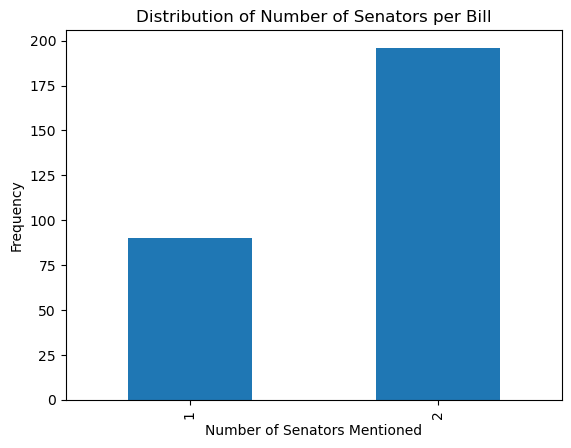

In [303]:
# Create a plot for the "Senator Count" variable
senate_amend_proposed_subset_2["Senator Count"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Number of Senators per Bill")
plt.xlabel("Number of Senators Mentioned")
plt.ylabel("Frequency")
plt.show()

**Q3.3 With how many different people does each Senator 1 coauthor bills?**

In [304]:
# Group by "Senator 1" and count the unique numbers of "Senator 2" for each Senator 1
senator_2_count_per_senator_1 = senate_amend_proposed_subset_2.groupby("Senator 1")["Senator 2"].nunique().reset_index(name="Total Senator 2 Count")

# Display the result
display(senator_2_count_per_senator_1)

,Senator 1,Total Senator 2 Count
0,Braun,5
1,Brown,0
2,Cornyn,9
3,Cramer,7
4,Cruz,0
5,Feinstein,1
6,Fischer,2
7,Grassley,1
8,Hawley,1
9,Inhofe,1


As shown above, 37 senators have played the role of "Senator 1". The "Total Senator 2 Count" column represents the number of different Second Senators (Senator 2) each First Senator (Senator 1) has coauthored bills with. For example, Senator Braun has 5 different individuals as Senator 2.

In [305]:
# Descriptive statistics
senator_2_count_per_senator_1["Total Senator 2 Count"].describe()

count    37.000000
mean      3.621622
std      10.050847
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max      57.000000
Name: Total Senator 2 Count, dtype: float64

On average, 3.62 different people appear as Senator 2 for each Senator 1. But a "median" Senator 1 only has one Senator 2.

It is important to note the large standard deviation and the existence of outliers, such as Senator McConnell who has 57 second senators.

The plot below visualizes the distribution of Second Senator numbers across First Senators:

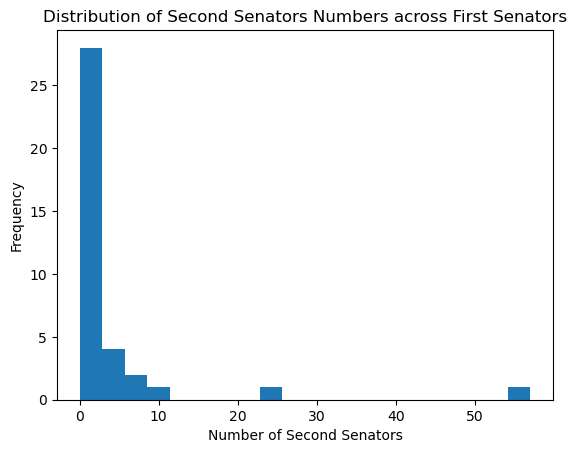

In [328]:
# Create a histogram for the "Mention Count" variable
plt.hist(senator_2_count_per_senator_1["Total Senator 2 Count"], bins=20)
plt.title("Distribution of Second Senators Numbers across First Senators")
plt.xlabel("Number of Second Senators")
plt.ylabel("Frequency")
plt.show()

# <span style="color:darkblue"> Part IV. Briefly Describe My Insights </span>

For Senate bills related to House floor actions (Question 2), the vast majority of senators are involved with one to four bills, showing less variation in behavior patterns across senators.

However, for bill actions related to "Senate amendment proposed (on the floor)," there is greater variation among senators. On average, each First Senator has connections with 3.62 Second Senators (Question 3). However, two First Senators are connected with 57 and 23 Second Senators, respectively, while nearly half of the total First Senators have no connections with any Second Senators. This shows a higher level of heterogeneity among senators.

In conclusion, the heterogeneity in senators' behavior patterns differs when dealing with different types of bill actions.